# Yellow-billed Cuckoo Occurrence Records Summary
This notebook is a tool for exploring data sets requested from GBIF (and eventually other sources), and mostly for developing criteria for filtering records (filter sets).  When the entire notebook is run, it retrieves records according to the filter sets specified and saves the results (records and some summary tables) in an sqlite database.  Some information is pulled from the parameters.sqlite database that is saved in this repository.

### General Setup

In [1]:
%matplotlib inline
import sqlite3
import pprint
import json
import pandas as pd
import numpy as np
pd.set_option('display.width', 600)
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.max_rows', 150)
from IPython.display import Image
from pygbif import occurrences
import matplotlib.pyplot as plt
import os
from datetime import datetime
t1 = datetime.now()
import sys
sys.path.append("T:/GAP/Data") # Path to config file.  User specific
import gapconfig as config

There is a bug with mpl_toolkits, the following code is a temp fix, hopefully.
https://stackoverflow.com/questions/52911232/basemap-library-using-anaconda-jupyter-notebooks-keyerror-proj-lib/54087410#54087410

In [2]:
os.environ['PROJ_LIB'] = r'c:\Users\nmtarr\AppData\Local\Continuum\miniconda3\envs\wrangler\Library\share'

### Set Variables
Fill out stuff in this cell.  

Notes:
default_coordUncertainty -- coordinateUncertaintyInMeters is often not provided.  Here is an option to use a default.  If you don't want anything entered, set this equal to False (boolean, not string).

In [3]:
species_id = 'exampleSP2'
summary_name = 'CuckooEx'
gbif_req_id = 'gbifRequestExample1'
gbif_filter_id = 'gbifFilterEx2'
workDir = 'T:/Occurrence_Records/'
codeDir = 'T:/Code/Wildlife-Wrangler/'
sys.path.append(codeDir)
import repo_functions as functions
inDir = workDir + 'Inputs/'
outDir = workDir + 'Outputs/'
default_coordUncertainty = 1000 # Note above.
SRID_dict = {'WGS84': 4326, 'AlbersNAD83': 5070} # Used in file names for output.
spdb = outDir + species_id + gbif_req_id + gbif_filter_id + '.sqlite'

username = config.gbif_username
password = config.gbif_password
email = config.gbif_email

print("Notebook run " + str(t1))
print(spdb)

Notebook run 2020-03-17 09:58:52.962988
T:/Occurrence_Records/Outputs/exampleSP2gbifRequestExample1gbifFilterEx2.sqlite


In [4]:
connjup = sqlite3.connect(codeDir + 'parameters.sqlite')
cursorjup = connjup.cursor()

# Get some variables
years = connjup.execute("""SELECT years_range 
                           FROM gbif_requests WHERE request_id = '{0}'""".format(gbif_req_id)).fetchone()[0]
gap_id = connjup.execute("""SELECT gap_id
                            FROM species_concepts WHERE species_id = '{0}'""".format(species_id)).fetchone()[0]
common_name = connjup.execute("""SELECT common_name
                                 FROM species_concepts WHERE species_id = '{0}'""".format(species_id)).fetchone()[0]

# Species Concept
Display information on the species from the parameters.sqlite database.

In [5]:
vals = cursorjup.execute("SELECT * FROM species_concepts WHERE species_id = '{0}';".format(species_id)).fetchall()[0]
cols = [x[1] for x in cursorjup.execute("PRAGMA table_info('species_concepts')").fetchall()]
pprint.pprint(dict(zip(cols, vals)))

{'bcb_id': None,
 'common_name': 'yellow-billed cuckoo',
 'detection_distance_meters': 100,
 'ebird_id': None,
 'end_year': None,
 'fws_id': None,
 'gap_id': 'bybcux',
 'gbif_id': '2496287',
 'geometry': None,
 'itis_tsn': '177831',
 'lumped_into': None,
 'notes': 'This is an example.',
 'scientific_name': 'Coccyzus americanus',
 'species_id': 'exampleSP2',
 'split_from': None,
 'start_year': None,
 'vetted_date': None,
 'vetted_how': None,
 'vetted_who': None}


# Filters
Display the parameters of the request filter set.  These are deployed during the step where records are retrieved from the API.

In [6]:
df1 = pd.read_sql_query(sql="SELECT * FROM gbif_requests WHERE request_id = '{0}'".format(gbif_req_id), con=connjup)
print("THE REQUEST FILTER SET")
print(df1.loc[0])

THE REQUEST FILTER SET
request_id                gbifRequestExample1
source                                   GBIF
lat_range                               27,41
lon_range                             -91,-75
years_range                         1999,2020
months_range                             1,12
geoissue                                False
coordinate                               True
country                                    US
geometry        POLYGON ((-84.480785172140...
creator                               N. Tarr
notes                     This is an example.
Name: 0, dtype: object


Display the parameters of the post-request filter set.  These are deployed after the records are retrieved from the API, but before they are stored in the occurrence record sqlite database.

In [7]:
df2 = pd.read_sql_query(sql="SELECT * FROM gbif_filters WHERE filter_id = '{0}'".format(gbif_filter_id), con=connjup)
print("THE POST REQUEST FILTER SET")
print(df2.loc[0])

THE POST REQUEST FILTER SET
filter_id                                     gbifFilterEx2
dataset                                                GBIF
institutions_omit                               iNaturalist
collection_codes_omit         EBIRD_CAN, EBIRD_NJ, EBIRD_AK
datasets_omit                                          None
has_coordinate_uncertainty                                0
max_coordinate_uncertainty                            10000
bases_omit                    FOSSIL_SPECIMEN, PRESERVED...
sampling_protocols_omit                                None
issues_omit                    GEODETIC_DATUM_ASSUMED_WGS84
duplicates_OK                                          True
creator                                             N. Tarr
notes                                   This is an example.
Name: 0, dtype: object


## Filter set justification
**default_coord_uncertainty:** 

**years_range:**

**months_range:** 

**geoissue:** 

**coordinate:** 

**country:**

**geometry:**

**collection_codes_omit:** 

**institutions_omit:** 

**datasets_omit:**

**has_coordinate_uncertainty:** 

**max_coordinate_uncertainty:** 

**bases_omit:** 

**sampling_protocols_omit:** 

**issues_omit:**

**duplicates:**

In [8]:
functions.retrieve_gbif_occurrences(codeDir, species_id, inDir, spdb, gbif_req_id, gbif_filter_id, 
                                    default_coordUncertainty, outDir, summary_name, username,
                                   password, email)

SPATIALITE_SECURITY set to relaxed
Created occurrence db: 0:00:00.333262
Got request params and sorted out geometry constraints: 0:00:00
22717 records available
Downloaded records: 0:02:05.803119
Summarized fields returned: 0:08:26.413400
Created summary table of request results: 0:00:00.068861
Performed post-request filtering: 0:00:00.085287
Calculated new columns, deleted some too: 0:00:00.066981
Inserted records into table: 0:00:00.539034
Summarized unique values retained: 0:00:00.005008
Updated occurrences table geometry column: 0:00:06.050533
DUPLICATES ON LATITUDE, LONGITUDE, DATE-TIME INCLUDED
Buffered points: 0:00:17.961906
Exported maps: 0:00:04.658646

Records saved in T:/Occurrence_Records/Outputs/exampleSP2gbifRequestExample1gbifFilterEx2.sqlite


### How many records made it through the filters?
This is the number that was actually saved in the occurrence record sqlite database.

In [9]:
conn_occ= sqlite3.connect(spdb)
curs_occ = conn_occ.cursor()
record_count = curs_occ.execute("SELECT COUNT(occ_id) FROM occurrences WHERE species_id = '{0}'".format(species_id)).fetchone()
print(str(record_count[0]) + " records")

21199 records


### Are there duplicate records left?
Duplicates based on latitude, longitude, and date-time should of been removed, with the record with the highest individualCount retained.

In [10]:
dups0 = curs_occ.execute("""SELECT count(occ_id) FROM occurrences WHERE occ_id NOT IN (SELECT occ_id FROM occurrences GROUP BY latitude, longitude, occurrenceDate HAVING max(IndividualCount));""").fetchall()
print(str(dups0[0][0]) + ' duplicate records retained based on xy coordinate and date-time')

5070 duplicate records retained based on xy coordinate and date-time


# Sources
#### Pre-filters

In [11]:
tables = cursorjup.execute("SELECT table_name FROM table_descriptions").fetchall()
tables = [x[0] for x in tables]

filter_sets = [gbif_req_id, gbif_filter_id]

sources = []
for s in filter_sets:
    s = s.strip()
    for tab in tables:
        columns = cursorjup.execute("SELECT column_name FROM column_descriptions WHERE table_name = '{0}'".format(tab)).fetchall()
        columns = [x[0] for x in columns]
        for col in columns:
            try:
                a = cursorjup.execute("SELECT source FROM {1} WHERE {2} = '{0}'".format(s, tab, col)).fetchone()[0]
                sources.append(a)
            except:
                pass
print(list(set(sources))[0])

GBIF


In [12]:
sources = pd.read_sql(sql="SELECT * FROM pre_filter_source_counts;", con=conn_occ)
print(sources)

   institutionCode  collectionCode                    datasetName      0
0              CAS             ORN                        UNKNOWN      1
1              CLO           EBIRD                        UNKNOWN  22480
2              CLO        EBIRD_AK                        UNKNOWN      2
3              CLO       EBIRD_BCN                        UNKNOWN      1
4              CLO  EBIRD_CAMERICA                        UNKNOWN     18
5              CLO       EBIRD_CAN                        UNKNOWN     21
6              CLO        EBIRD_CB                        UNKNOWN      5
7              CLO       EBIRD_MEX                        UNKNOWN      4
8              CLO        EBIRD_MO                        UNKNOWN      1
9              CLO        EBIRD_NJ                        UNKNOWN      2
10             CLO        EBIRD_PA                        UNKNOWN      2
11             CLO       EBIRD_PNW                        UNKNOWN     11
12             CLO        EBIRD_PR                 

#### Post-filters

In [13]:
tables = cursorjup.execute("SELECT table_name FROM table_descriptions").fetchall()
tables = [x[0] for x in tables]

filter_sets = [gbif_req_id, gbif_filter_id]

sources = []
for s in filter_sets:
    s = s.strip()
    for tab in tables:
        columns = cursorjup.execute("SELECT column_name FROM column_descriptions WHERE table_name = '{0}'".format(tab)).fetchall()
        columns = [x[0] for x in columns]
        for col in columns:
            try:
                a = cursorjup.execute("SELECT source FROM {1} WHERE {2} = '{0}'".format(s, tab, col)).fetchone()[0]
                sources.append(a)
            except:
                pass
print(list(set(sources))[0])

sql = "SELECT institutionCode, collectionCode, datasetName, COUNT(occ_id) FROM occurrences GROUP BY institutionCode, collectionCode, datasetName;"
sources = pd.read_sql(sql=sql, con=conn_occ)
print(sources)

GBIF
   institutionCode  collectionCode datasetName  COUNT(occ_id)
0              CLO           EBIRD     UNKNOWN          21074
1              CLO       EBIRD_BCN     UNKNOWN              1
2              CLO  EBIRD_CAMERICA     UNKNOWN             18
3              CLO        EBIRD_CB     UNKNOWN              5
4              CLO        EBIRD_MO     UNKNOWN              1
5              CLO        EBIRD_PA     UNKNOWN              2
6              CLO       EBIRD_PNW     UNKNOWN             11
7              CLO        EBIRD_PR     UNKNOWN              2
8              CLO        EBIRD_QC     UNKNOWN              1
9              CLO        EBIRD_TX     UNKNOWN              2
10             CLO        EBIRD_VA     UNKNOWN             68
11             CLO      EBIRD_VINS     UNKNOWN              1
12             CLO        EBIRD_WI     UNKNOWN             13


# Bases
#### Pre-filter

In [14]:
bases = pd.read_sql(sql="SELECT value as basisOfRecord, count FROM pre_filter_value_counts WHERE attribute = 'bases';", con=conn_occ)
print(bases)

        basisOfRecord  count
0   HUMAN_OBSERVATION  22711
1  PRESERVED_SPECIMEN      6


#### Post-filters

In [15]:
sql = "SELECT basisOfRecord, COUNT(occ_id) as count FROM occurrences GROUP BY basisOfRecord;"
bases = pd.read_sql(sql=sql, con=conn_occ)
print(bases)

       basisOfRecord  count
0  HUMAN_OBSERVATION  21199


# Protocols
#### Pre-filters

In [16]:
protocol = pd.read_sql(sql="SELECT value as samplingProtocol, count FROM pre_filter_value_counts WHERE attribute = 'samplingProtocols';", con=conn_occ)
print(protocol)

  samplingProtocol  count
0          UNKNOWN  22717


#### Post-filters

In [17]:
sql = "SELECT samplingProtocol, COUNT(occ_id) as count FROM occurrences GROUP BY samplingProtocol;"
print(pd.read_sql(sql=sql, con=conn_occ))

  samplingProtocol  count
0          UNKNOWN  21199


# Issues
#### Pre-filters

In [18]:
iss = pd.read_sql(sql="SELECT value as issues, count FROM pre_filter_value_counts WHERE attribute = 'issues';", con=conn_occ)
pd.set_option('display.max_colwidth', 80)
print(iss)

                                                   issues  count
0  ['COORDINATE_ROUNDED', 'GEODETIC_DATUM_ASSUMED_WGS84']     45
1                                  ['COORDINATE_ROUNDED']  18423
2                        ['GEODETIC_DATUM_ASSUMED_WGS84']     20
3                                                      []   4229


#### Post-filters

In [19]:
sql = "SELECT issues, COUNT(occ_id) as count FROM occurrences GROUP BY issues;"
print(pd.read_sql(sql=sql, con=conn_occ))

                   issues  count
0  ['COORDINATE_ROUNDED']  17220
1                      []   3979


# Descriptions of filtered records

### Locations

T:/Code/Wildlife-Wrangler\repo_functions.py:42: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  height=3200000, width=5000000)
T:/Code/Wildlife-Wrangler\repo_functions.py:44: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map.drawstates(color='grey')
T:/Code/Wildlife-Wrangler\repo_functions.py:45: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map.drawcountries(color='grey')
T:/Code/Wildlife-Wrangler\repo_functions.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  color=mapfile['linecolor'])


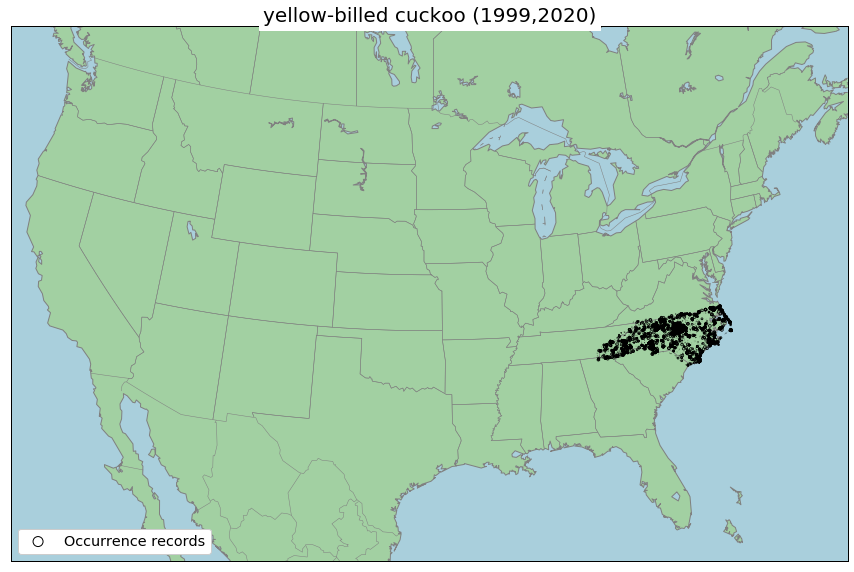

In [20]:
shp1 = {'file': '{0}{1}_polygons'.format(outDir, summary_name), 'column': None,
        'alias': 'Occurrence records', 'drawbounds': True, 'linewidth': .75, 'linecolor': 'k',
        'fillcolor': None, 'marker':'o'}

# Display occurrence polygons
map_these=[shp1]
    
title="{1} ({0})".format(years, common_name)
functions.MapShapefilePolygons(map_these=map_these, title=title)

### Years represented

Text(0.5, 1.0, 'Occurrences per Year')

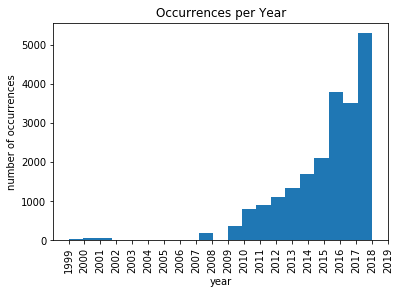

In [21]:
occ_years = [int(x[0]) for x in curs_occ.execute("SELECT strftime('%Y', occurrenceDate) FROM occurrences").fetchall()]
years = connjup.execute("SELECT years_range FROM gbif_requests WHERE request_id = '{0}'".format(gbif_req_id)).fetchone()[0]
years = years.split(',')
yearsrng = list(range(int(years[0]), int(years[1]), 1))
binsnum = int(years[1]) - int(years[0])
plt.hist(occ_years, bins=binsnum)
plt.ylabel("number of occurrences")
plt.xlabel("year")
plt.xticks(yearsrng, rotation=90)
plt.title("Occurrences per Year")

### Months represented

Text(0.5, 1.0, 'Occurrences per Month')

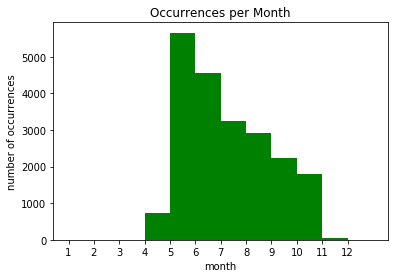

In [22]:
occ_months = [int(x[0]) for x in curs_occ.execute("SELECT strftime('%m', occurrenceDate) FROM occurrences").fetchall()]
plt.hist(occ_months, bins=range(1, 14), color="g")
plt.ylabel("number of occurrences")
plt.xlabel("month")
plt.xticks(range(1, 13))
plt.title("Occurrences per Month")

### Distribution of coordinate uncertainty values

Text(0.5, 1.0, 'Coordinate Uncertainty')

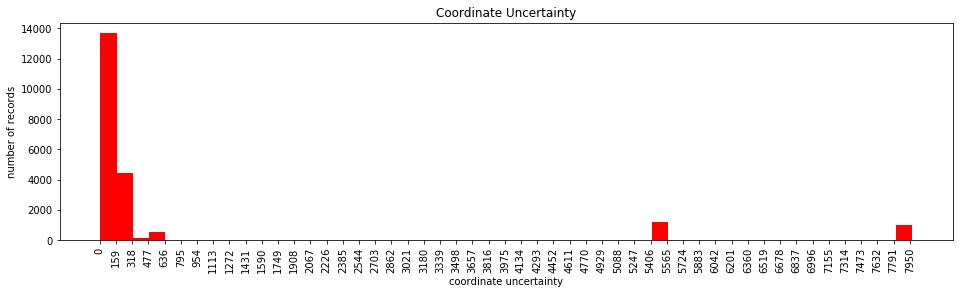

In [23]:
occ_cert = [int(x[0]) for x in curs_occ.execute("SELECT coordinateUncertaintyInMeters FROM occurrences").fetchall()]
maxi = np.max(occ_cert)
plt.figure(figsize=(16,4))
plt.hist(occ_cert, bins=50, color="r")
plt.xticks(range(0, maxi, int(maxi/50)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("coordinate uncertainty")
plt.title("Coordinate Uncertainty")

Text(0.5, 1.0, 'Coordinate Uncertainty - Zoomed In')

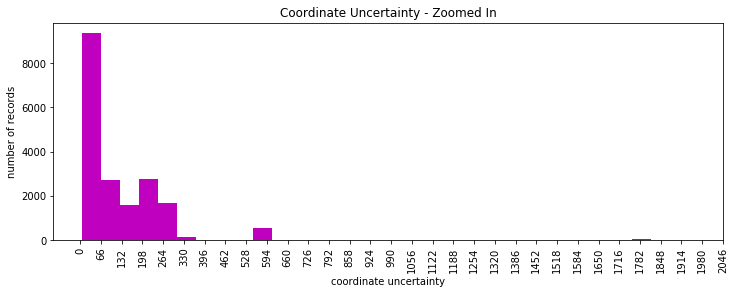

In [24]:
rng_max = 2000
occ_cert2 = [x for x in occ_cert if x <= rng_max]
plt.figure(figsize=(12,4))
plt.hist(occ_cert2, bins=30, color="m", align='mid')
plt.xticks(range(0, rng_max + 100, int(rng_max/30.)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("coordinate uncertainty")
plt.title("Coordinate Uncertainty - Zoomed In")

### Establishment means reported

In [25]:
establishment = curs_occ.execute("SELECT vals FROM unique_values WHERE field = 'establishment' AND step = 'filter';").fetchall()[0]
for est in establishment:
    est = est.replace('[', '').strip().replace(']', '').replace("'", "")
    print(est)

UNKNOWN


### Identification qualifiers included

In [26]:
quali = curs_occ.execute("SELECT DISTINCT vals FROM unique_values WHERE field = 'IDqualifier' AND step = 'filter';").fetchall()[0]
for q in quali:
    q = q.replace('[', '').strip().replace(']', '').replace("'", "")
    print(q)

UNKNOWN


### Remarks included

In [27]:
remarks = curs_occ.execute("SELECT DISTINCT remarks FROM occurrences;").fetchall()
if len(remarks) <= 20:
    try:
        for rem in remarks:
            if rem[0][0:1] == ';':
                print(rem[0][2:])
            else:
                print(rem[0])
    except:
        pass
else:
    print("More than 20 remarks, consult the occurrence database.")

More than 20 remarks, consult the occurrence database.


### Attributes returned for the records in the request (pre-filters)

In [28]:
fields_summary = pd.read_sql("SELECT * FROM gbif_fields_returned", conn_occ)#, index_col='index')
fields_summary.index.name = 'Field'
pd.set_option('display.max_rows', 250)
print(fields_summary)

                                  attribute  included(n)  populated(n)
Field                                                                 
0                    acceptedScientificName        22717         22717
1                          acceptedTaxonKey        22717         22717
2                              accessRights            4             4
3                             basisOfRecord        22717         22717
4                             catalogNumber        22717         22717
5                                     class        22717         22717
6                                  classKey        22717         22717
7                            collectionCode        22717         22717
8                              collectionID            3             3
9                                 continent            6             6
10            coordinateUncertaintyInMeters           58            58
11                                  country        22717         22717
12    

### Runtime

In [29]:
t2 = datetime.now()
print(t2 - t1)

0:12:01.146613
